### set folder_name and `num_trials`
- `num_trials` and `threshold_shift` based on preprocessing alignment (see PreprocessLeverData notebooks) and can be found for each day's session in the Google sheets analysis log

In [1]:
name = 'ANM5'
session = '20240212_d1'
num_trials = 57
threshold_shift = 0.0

In [2]:
hit_trials_to_exclude = [53]

### imports:

In [3]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd
import scipy.signal as signal
import scipy.interpolate as interpolate
import pickle
import glob # find files in a directory
import re # regex for string parsing

from common.set_matplotlib_settings import set_matplotlib_settings
from common.load_tonedisc_matfile import load_tonedisc_matfile
from common.select_trials import select_hit_trials
from common.select_trials import save_custom_hit_trials
from common.select_trials import select_custom_hit_trials
from hit_movements.get_movement_thresholds import get_movement_thresholds
from hit_movements.extract_leverpresses import extract_leverpresses
from common.extract_movement_intervals import extract_movement_intervals

### Setup folders and matfiles

In [4]:
tone_discriminiation_matfile = '../Data_Copy/ToneDiscriminationData/'+name+'/ToneDisc_'+name+'_'+session+'.mat'
params, response, arduino, respMTX, MTXTrialType = load_tonedisc_matfile(tone_discriminiation_matfile)

PreprocessLeverData_folder = "../Data_Copy/AnalysisData/"+name+"/PreprocessLeverData_"+name+"_"+session+"/"
output_folder = "../Data_Copy/AnalysisData/"+name+"/HitMovements_"+name+"_"+session+"/"
!mkdir {output_folder}

respMTX shape: (58, 7)
MTXTrialType shape: (1, 1)
number of trials: 58
mkdir: ../Data_Copy/AnalysisData/ANM5/HitMovements_ANM5_20240212_d1/: File exists


### find all movements from trials that meet all thresholds

select all hit trials for consideration

In [5]:
hit_trials = select_hit_trials(respMTX, num_trials)
save_custom_hit_trials(output_folder, hit_trials)

53  hit trials in this session.


delete trials as necessary and resave

In [6]:
for trial_index in hit_trials_to_exclude:
    hit_trials.remove(trial_index)
save_custom_hit_trials(output_folder, hit_trials)
hit_trials = select_custom_hit_trials(output_folder)

52  hit trials in this session.


_in LeverData voltage_

In [7]:
movement_baseline, movement_threshold, no_movement_threshold = get_movement_thresholds(params, respMTX, threshold_shift)

movement_baseline for all trials should be the same:  0.6484848484848488
mvt threshold:  0.25 + movement_baseline =  0.8984848484848488
nomvt threshold:  0.15 + movement_baseline =  0.7984848484848488


`leverpress_informations`: each selected trial has a row

columns are `trial_index` |  `leverpress_left_index` sample when leverpress starts | `leverpress_right_index` sample when leverpress ends

In [8]:
hit_leverpress_informations = extract_leverpresses(hit_trials, PreprocessLeverData_folder, \
                                              movement_baseline, movement_threshold, no_movement_threshold,\
                                                output_folder)

Checking trial  0 ...
finding right threshold...
met
finding left threshold...
met
Checking trial  1 ...
leverpress detection was at below first threshold, try moving leverpress index up...
new leverpress index value:  0.8987069616133763
finding right threshold...
met
finding left threshold...
met
Checking trial  2 ...
leverpress detection was at below first threshold, try moving leverpress index up...
new leverpress index value:  0.9020915545752555
finding right threshold...
met
finding left threshold...
met
Checking trial  3 ...
leverpress detection was at below first threshold, try moving leverpress index up...
new leverpress index value:  0.8986613051075594
finding right threshold...
met
finding left threshold...
met
Checking trial  4 ...
leverpress detection was at below first threshold, try moving leverpress index up...
new leverpress index value:  0.8991794950392604
finding right threshold...
met
finding left threshold...
met
Checking trial  5 ...
leverpress detection was at bel

met
Checking trial  31 ...
leverpress detection was at below first threshold, try moving leverpress index up...
new leverpress index value:  0.8994924566315783
finding right threshold...
met
finding left threshold...
met
Checking trial  32 ...
leverpress detection was at below first threshold, try moving leverpress index up...
new leverpress index value:  0.8988330377211042
finding right threshold...
met
finding left threshold...
met
Checking trial  33 ...
leverpress detection was at below first threshold, try moving leverpress index up...
new leverpress index value:  0.8988104698621493
finding right threshold...
met
finding left threshold...
met
Checking trial  34 ...
leverpress detection was at below first threshold, try moving leverpress index up...
new leverpress index value:  0.9009833717016651
finding right threshold...
met
finding left threshold...
threshold:  0.7984848484848488 value at trial edge:  1.0836683349649925
first threshold not met within trial.
Checking trial  35 ...

### Save movements from `movements` into separate "movement_trial#" .npy files
`movement`: first row is times, second row is leverdata

Movements will have MVT0 subtracted off and be temporally aligned to be comparable

In [9]:
hit_movements = extract_movement_intervals(hit_leverpress_informations, \
                                           'processed', PreprocessLeverData_folder, PreprocessLeverData_folder, output_folder, \
                                            movement_baseline)

check by plotting movements that are MVT0 subtracted and temporally aligned:

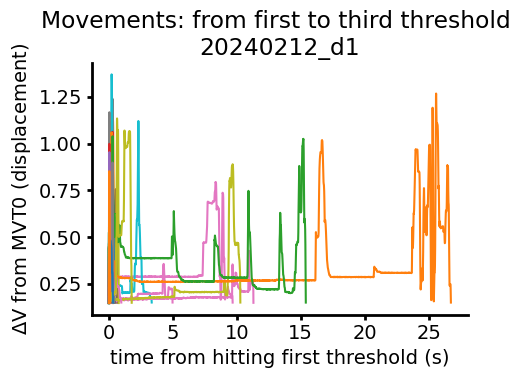

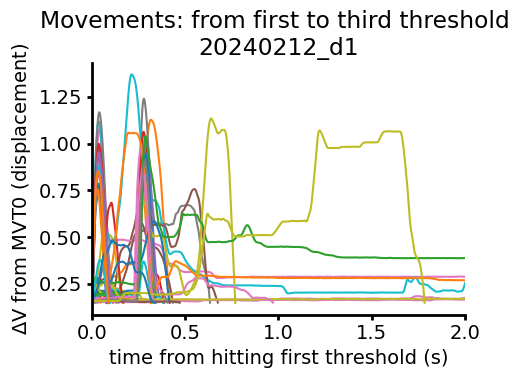

In [10]:
set_matplotlib_settings()

for hit_movement in hit_movements:
    # also check by plotting all of the movements
    plt.plot(hit_movement[0, :], hit_movement[1, :])
plt.title("Movements: from first to third threshold \n"+session)
plt.xlabel("time from hitting first threshold (s)")
plt.ylabel("$\Delta$V from MVT0 (displacement)")

plt.savefig(output_folder+"plot_movements.png")
plt.show()

for hit_movement in hit_movements:
    # also check by plotting all of the movements
    plt.plot(hit_movement[0, :], hit_movement[1, :])
plt.title("Movements: from first to third threshold \n"+session)
plt.xlabel("time from hitting first threshold (s)")
plt.ylabel("$\Delta$V from MVT0 (displacement)")
plt.xlim([0, 2])
plt.show()